In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0916811501PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.196e-01 +/- 8.675e-03 (87.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-103
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.137e+04 sec
 Using fit statistic: chi
 Using Background File                P0916811501PNS003BGSPEC0001.FTZ
  Background Exposure Time: 1.135e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY9.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0916811501PNS003SRCARF0001.FTZ



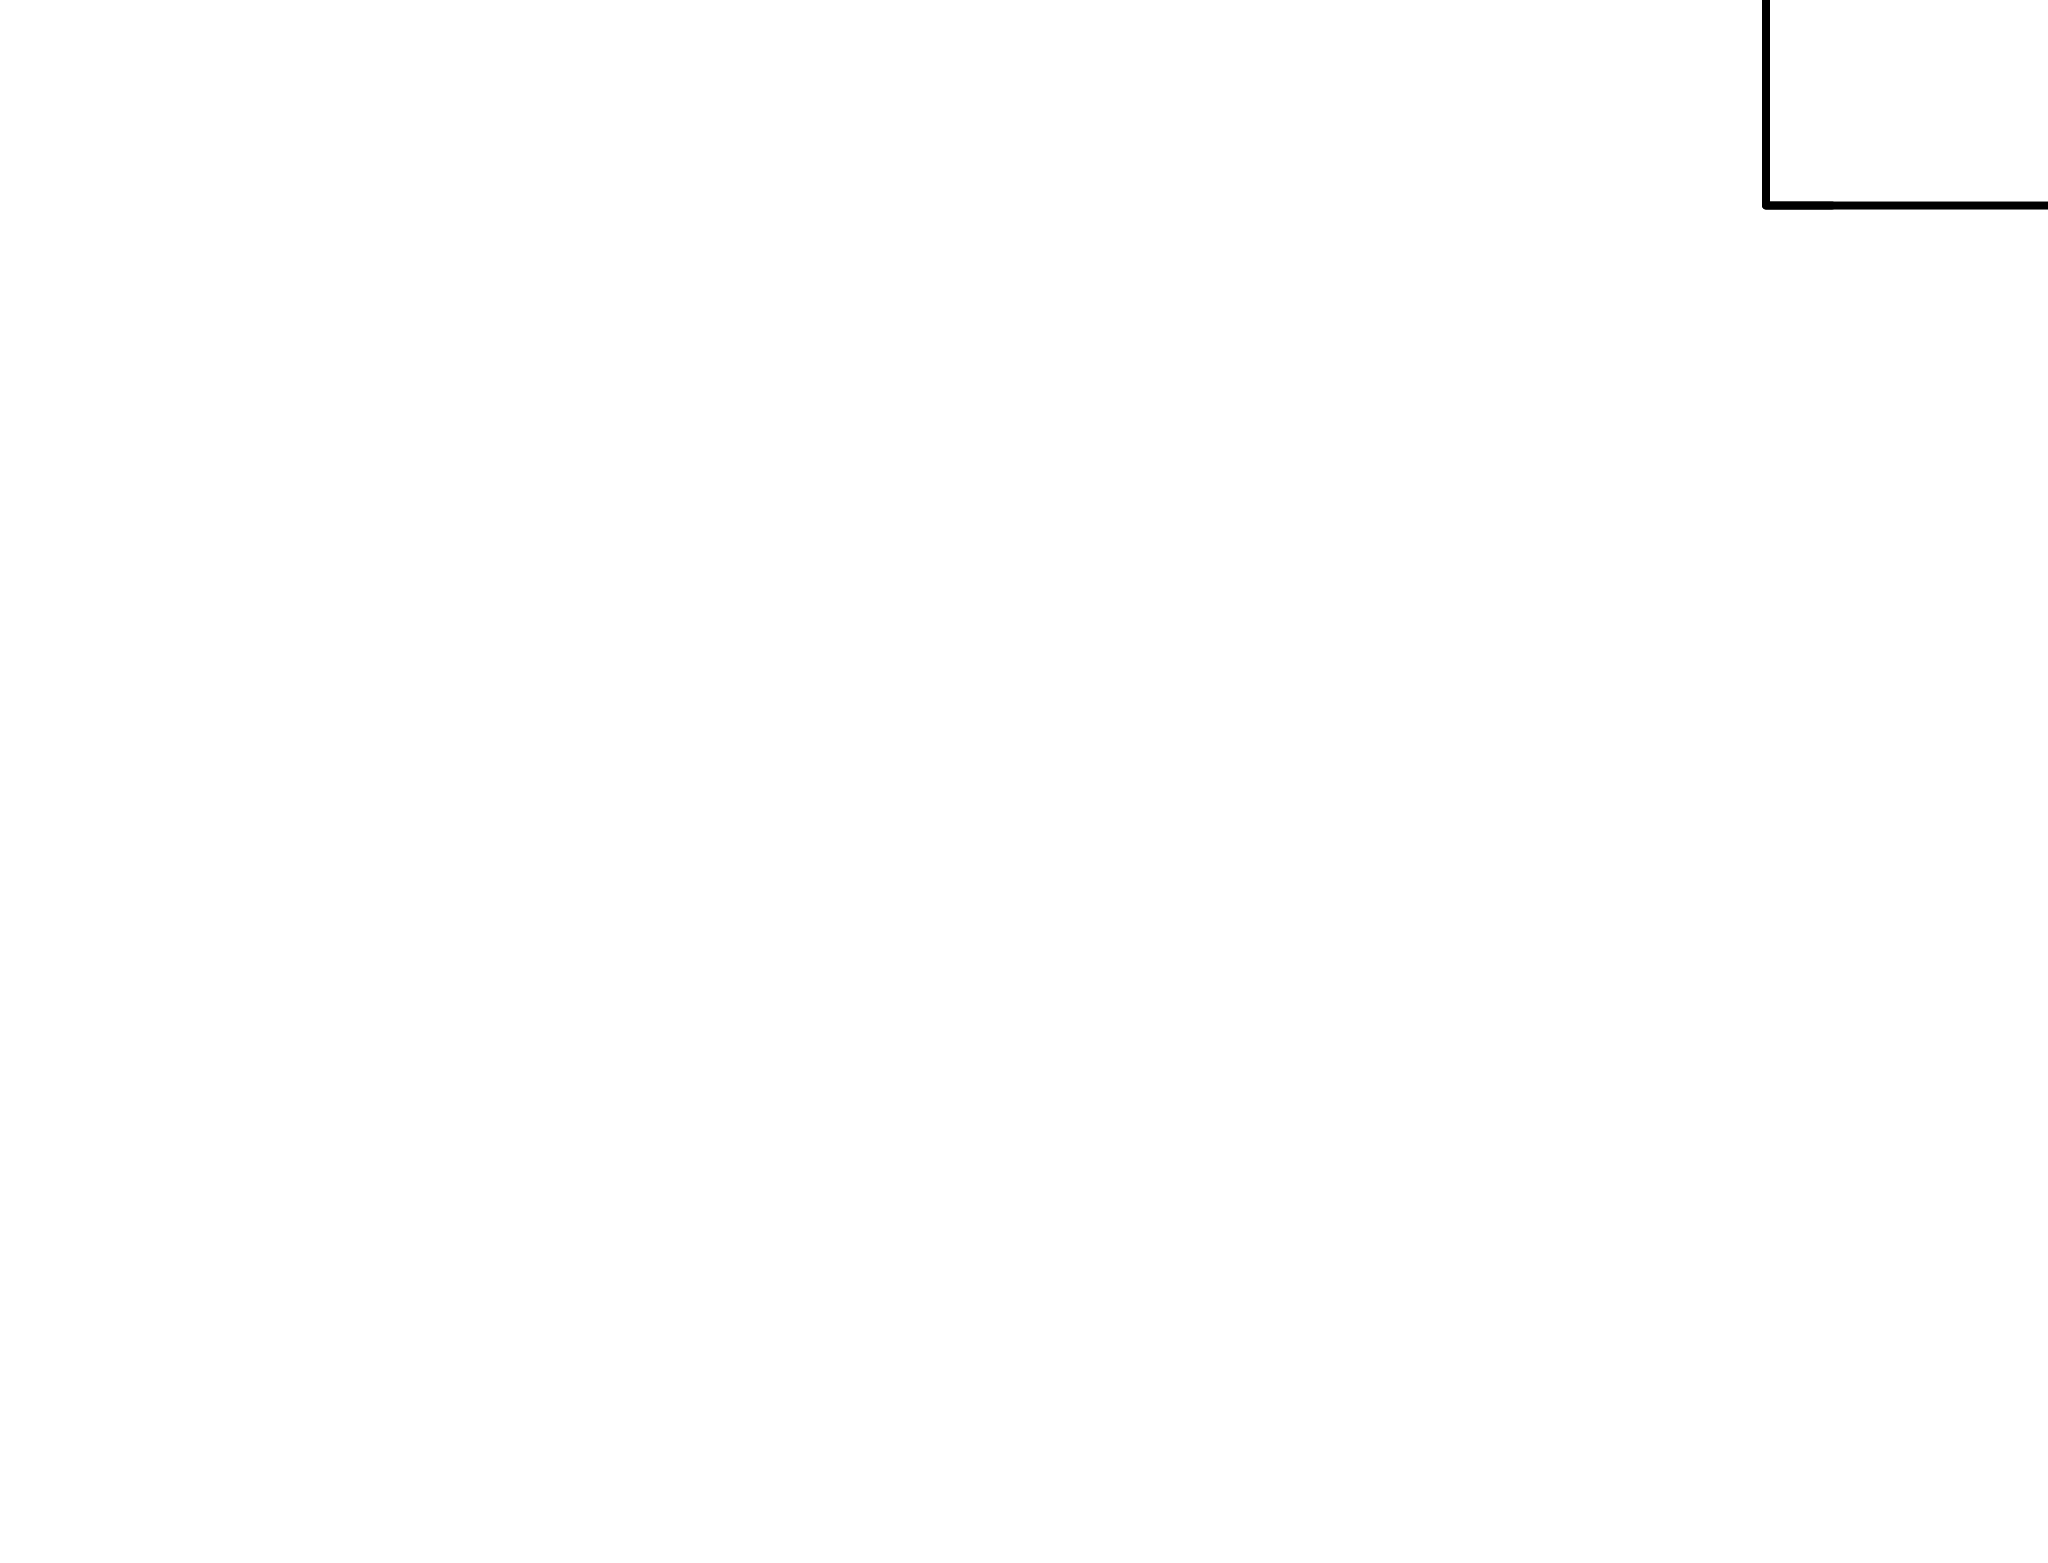

In [2]:
spec_fnames = glob.glob('P*501PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.001 2")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (103) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verne

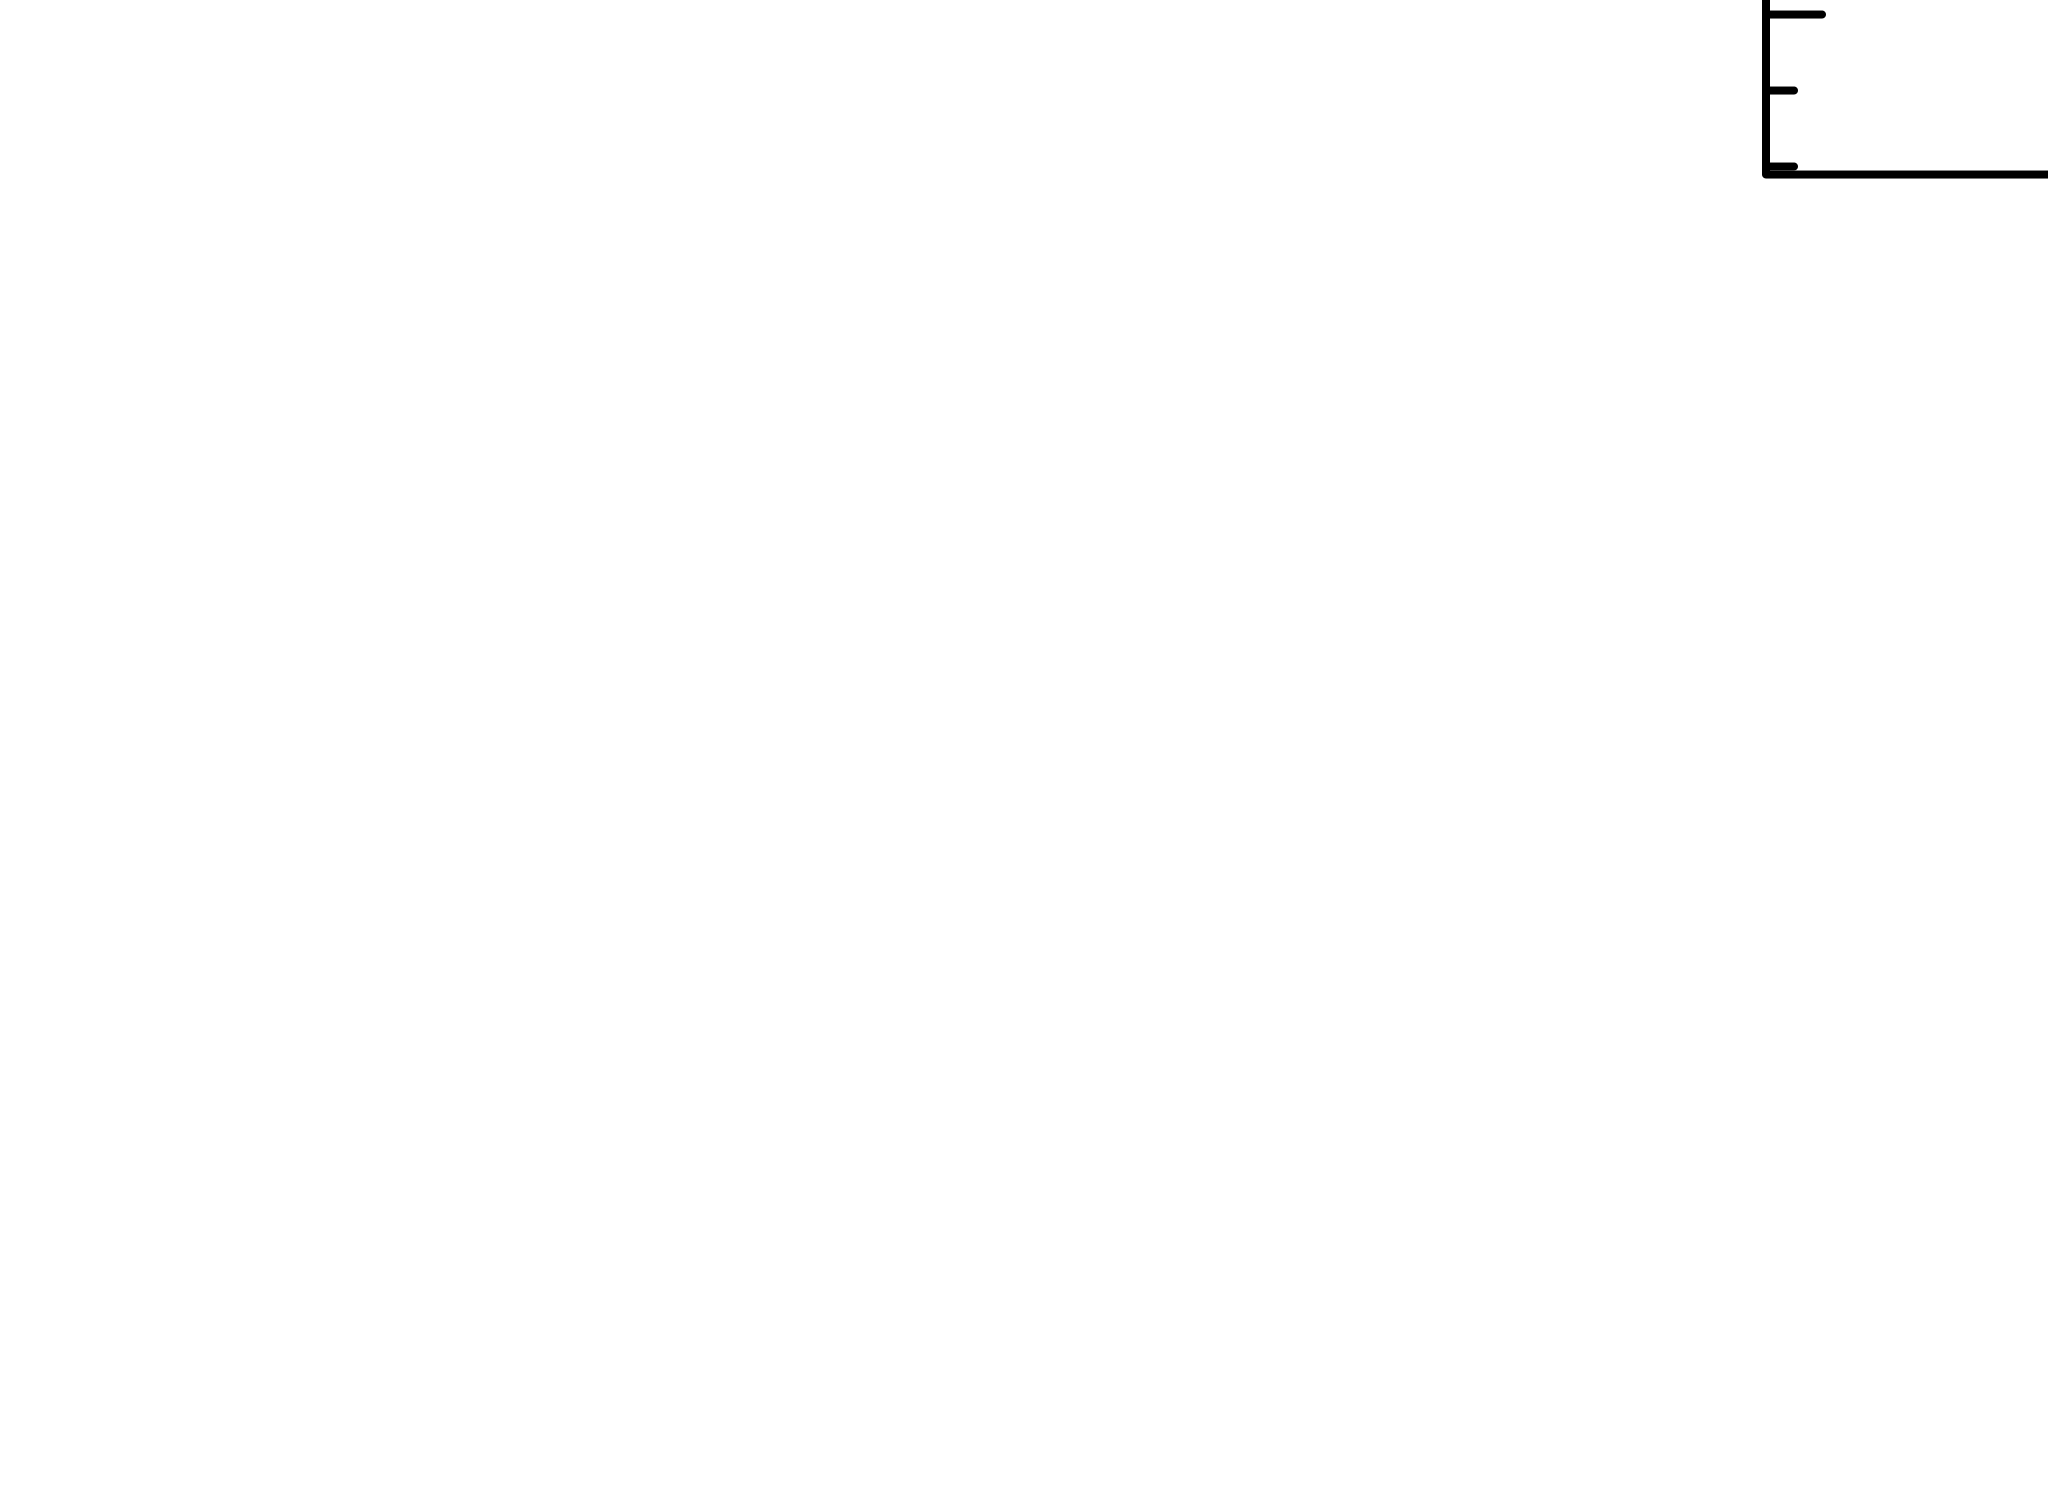

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

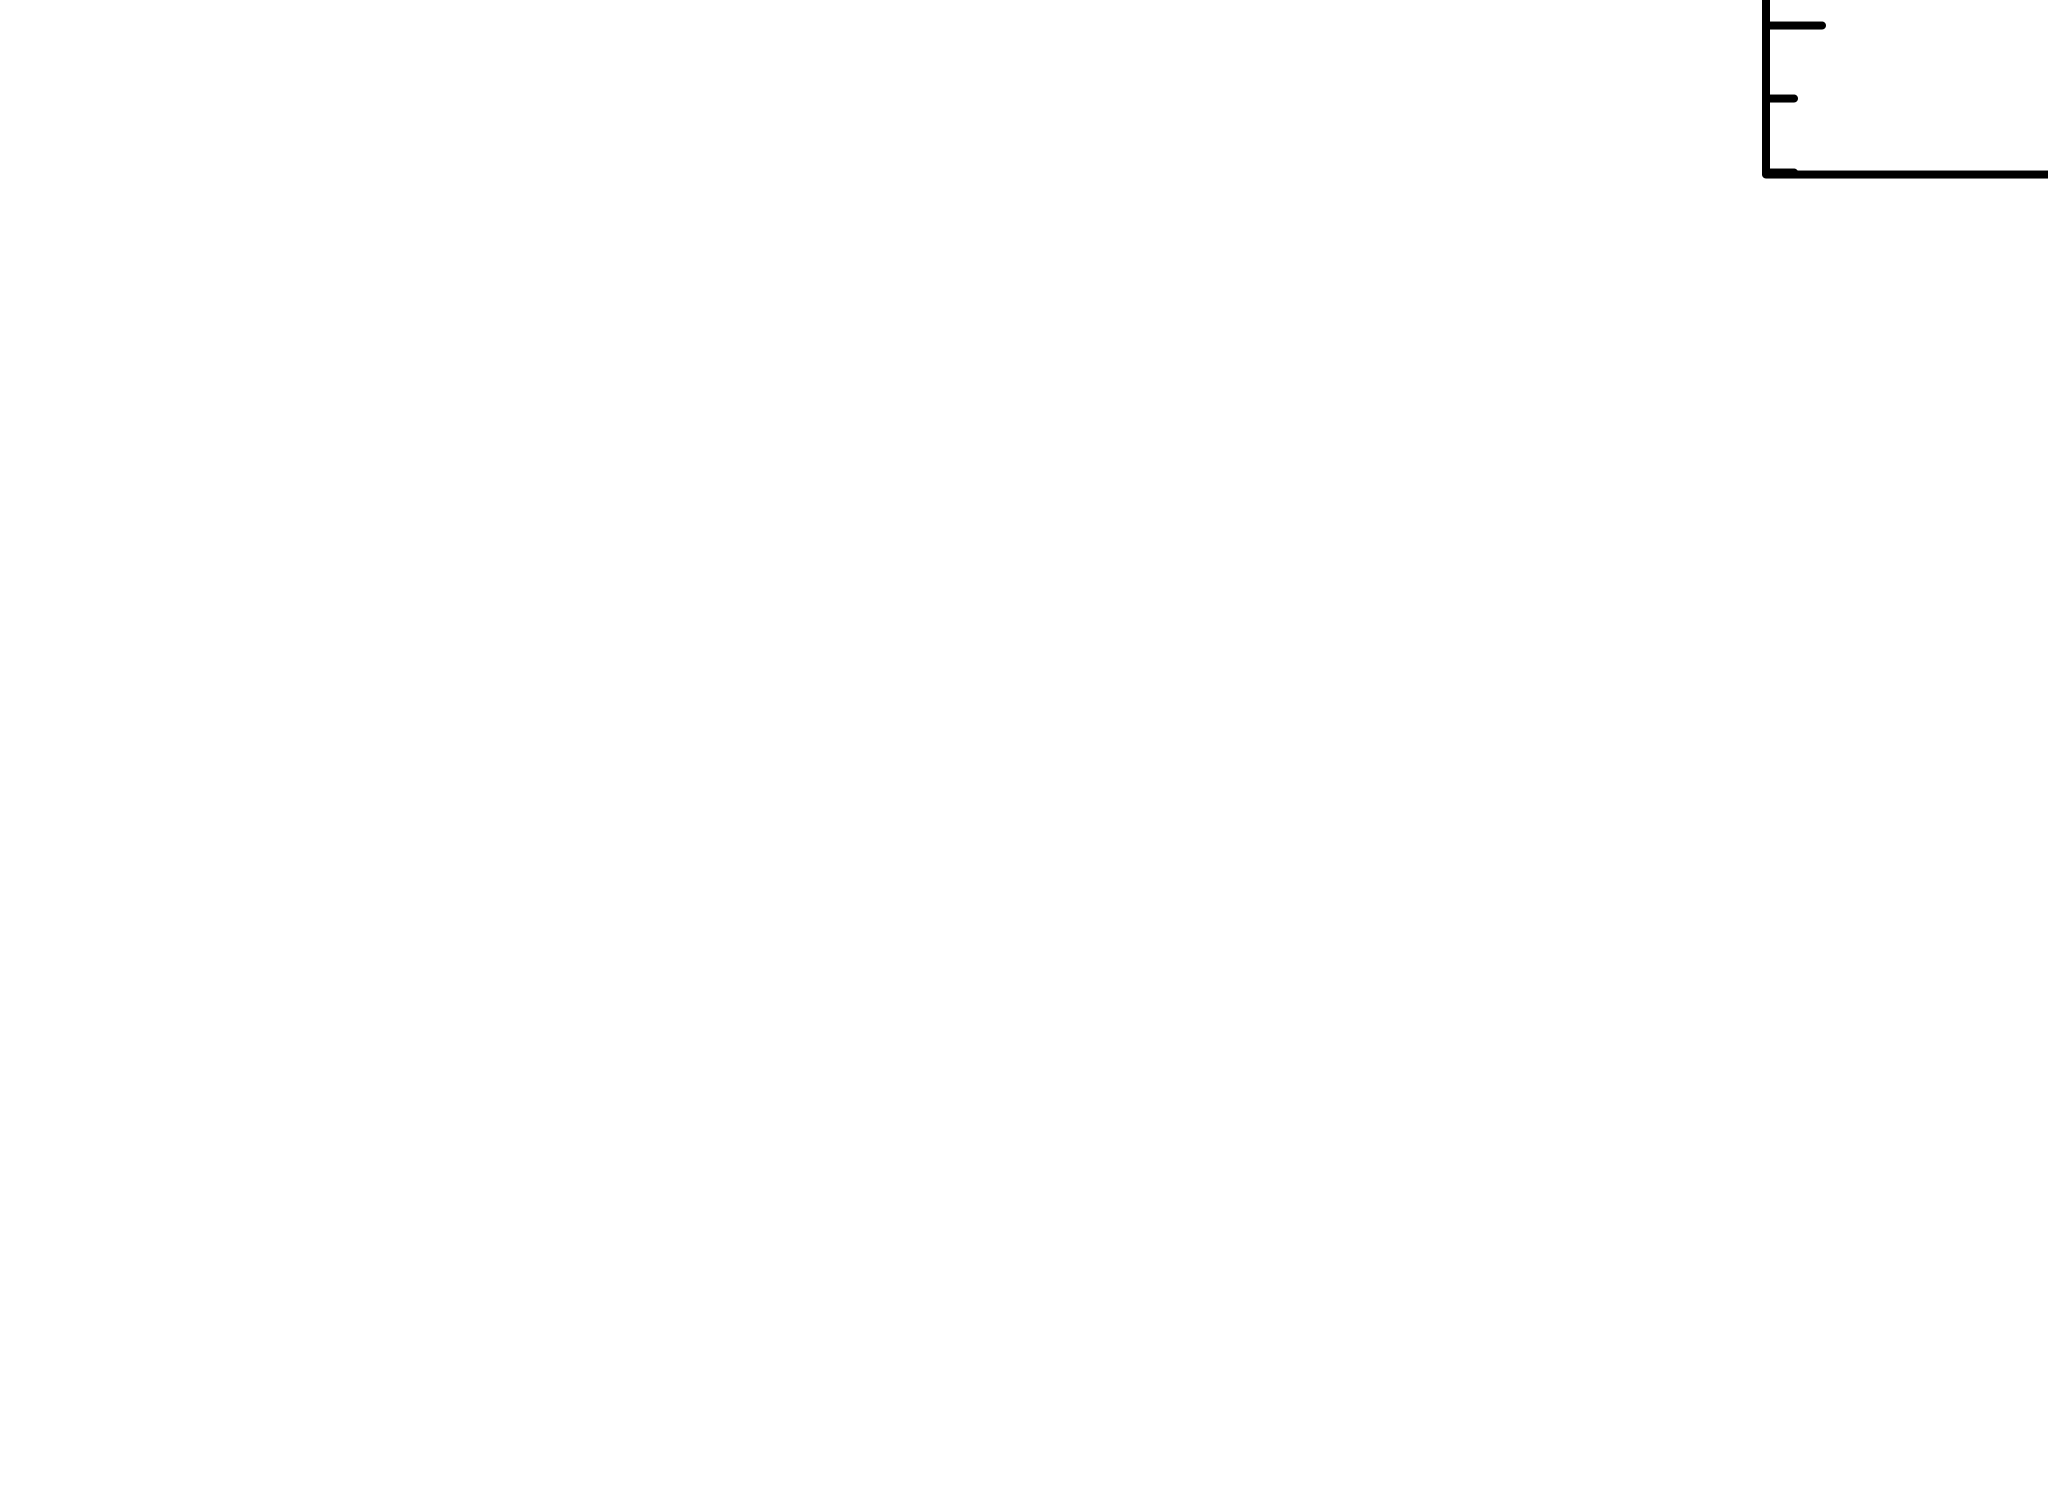


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.313091e+10     using 102 bins.

Test statistic : Chi-Squared              8.313091e+10     using 102 bins.
 Null hypothesis probability of 0.000000e+00 with 99 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
6968.55      110.559      -1      0.185541       1.21373   3.17049e-05
4615.01      3.03089e+06  -1     0.0779260       3.54462   0.000152594
3200.86      954338       -1      0.116116       1.70107   0.000394

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.755817e+09     using 102 bins.

Test statistic : Chi-Squared              8.755817e+09     using 102 bins.
 Null hypothesis probability of 0.000000e+00 with 99 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
5857.01      155.02       -2     0.0682068       23.5778   0.000125032
5404.39      1.91783e+06  -1     0.0186364       11.2608   0.000117662
4543.67      2.58832e+06  -2      0.247718       1.57549   0.00040516

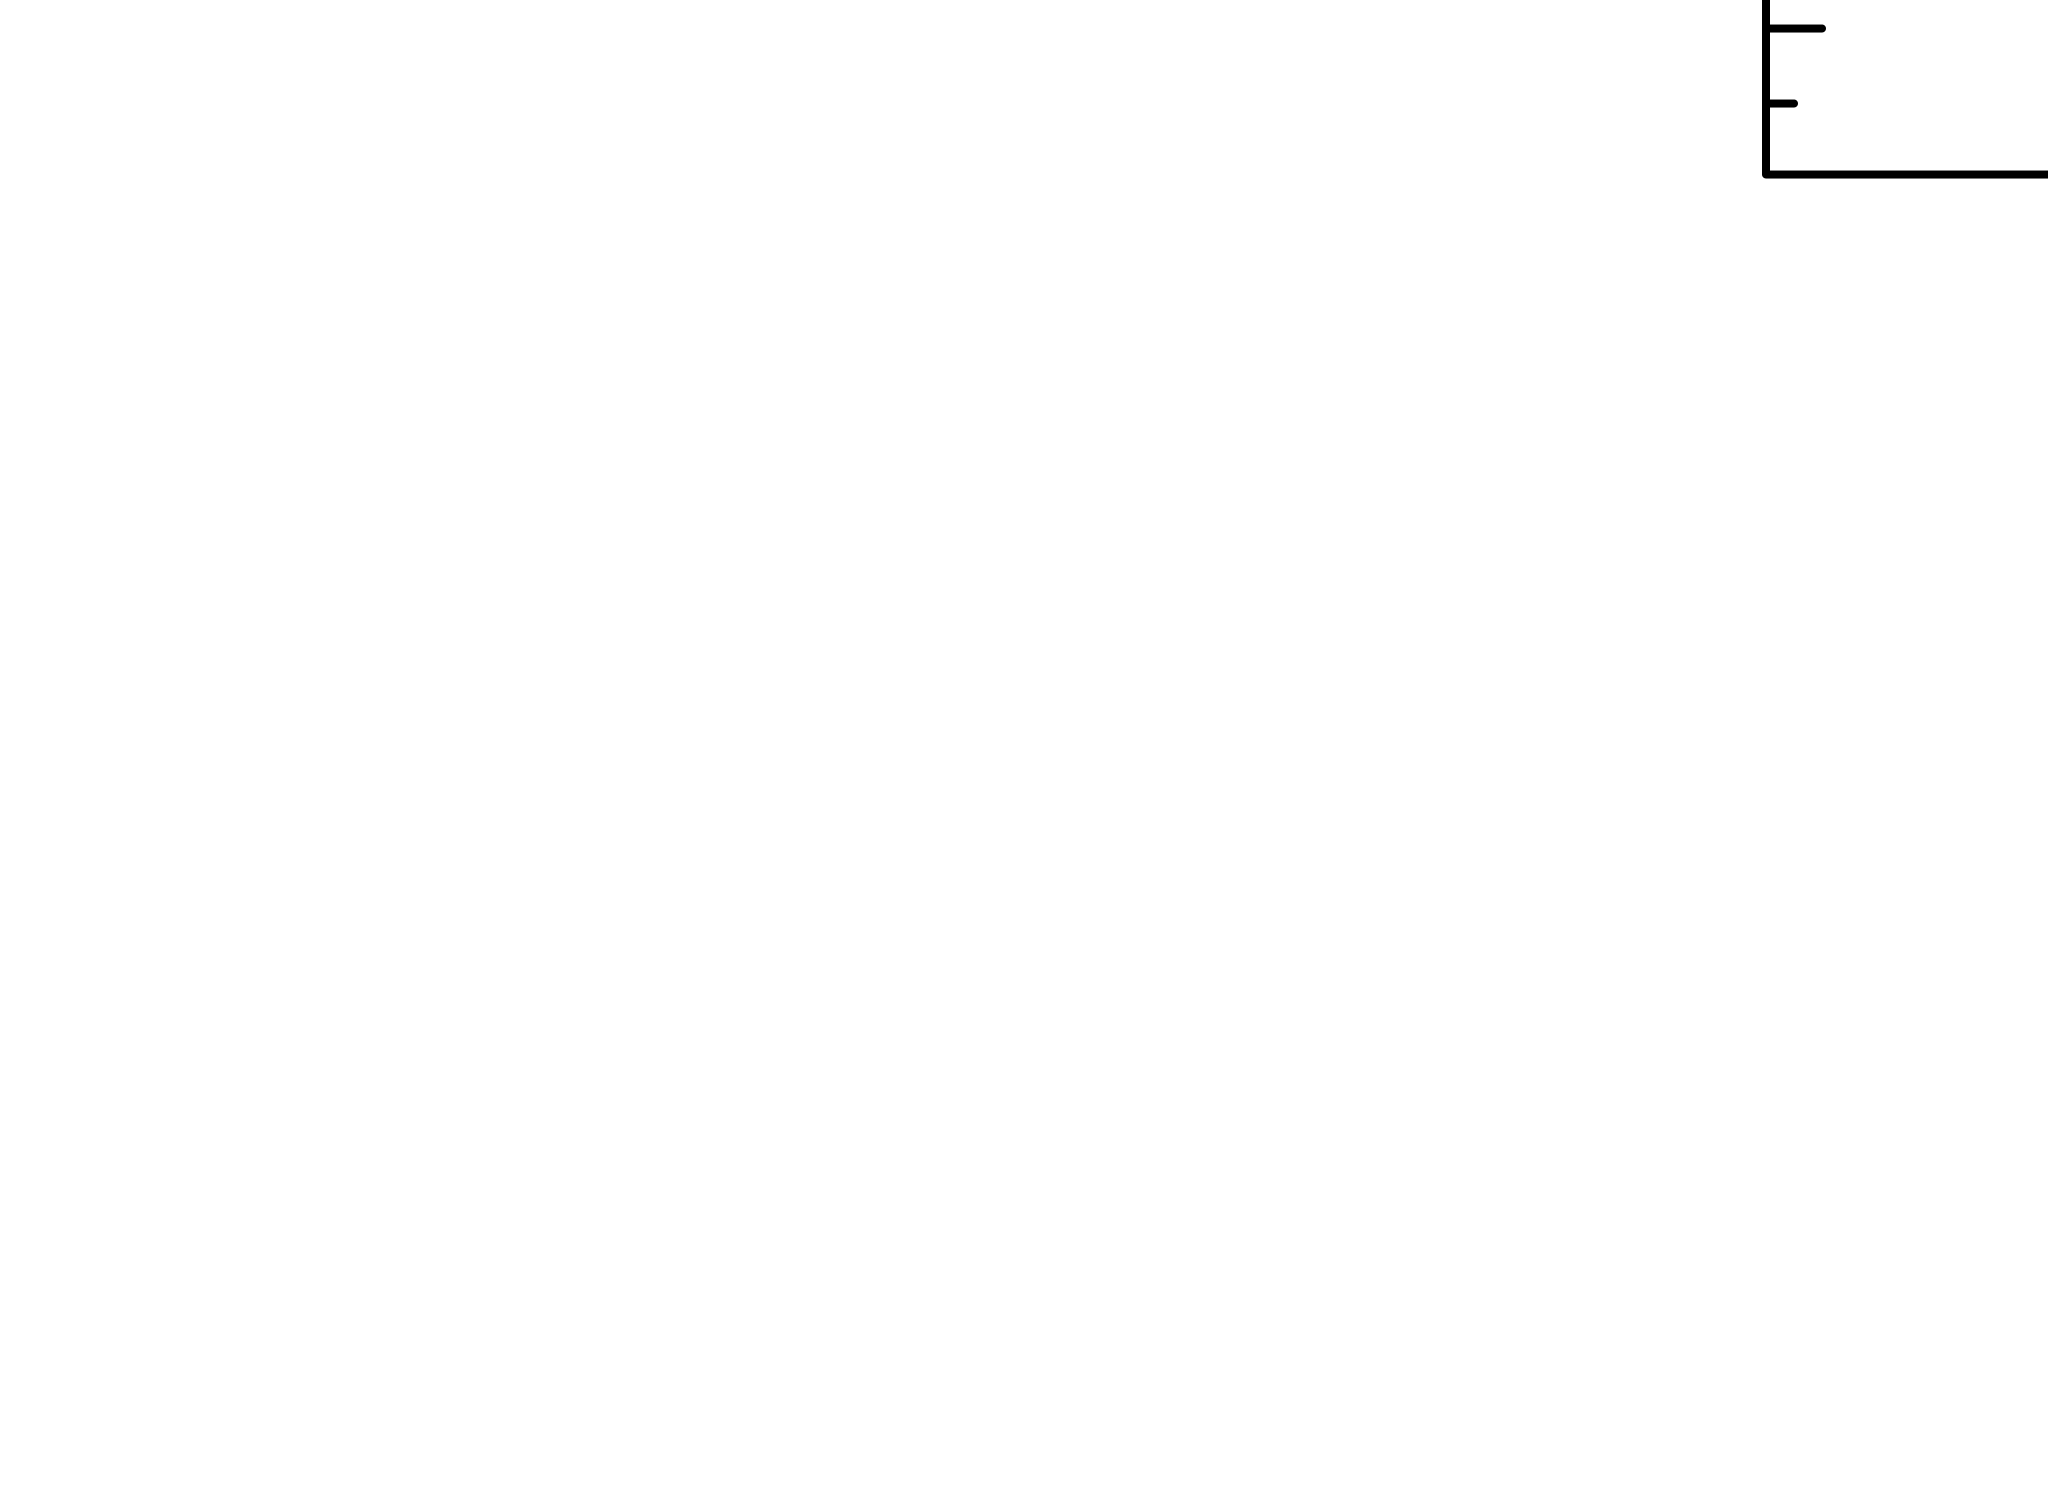

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.088980e+08     using 102 bins.

Test statistic : Chi-Squared              6.088980e+08     using 102 bins.
 Null hypothesis probability of 0.000000e+00 with 99 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
1096.56      895.696      -3      0.485886      0.823730 

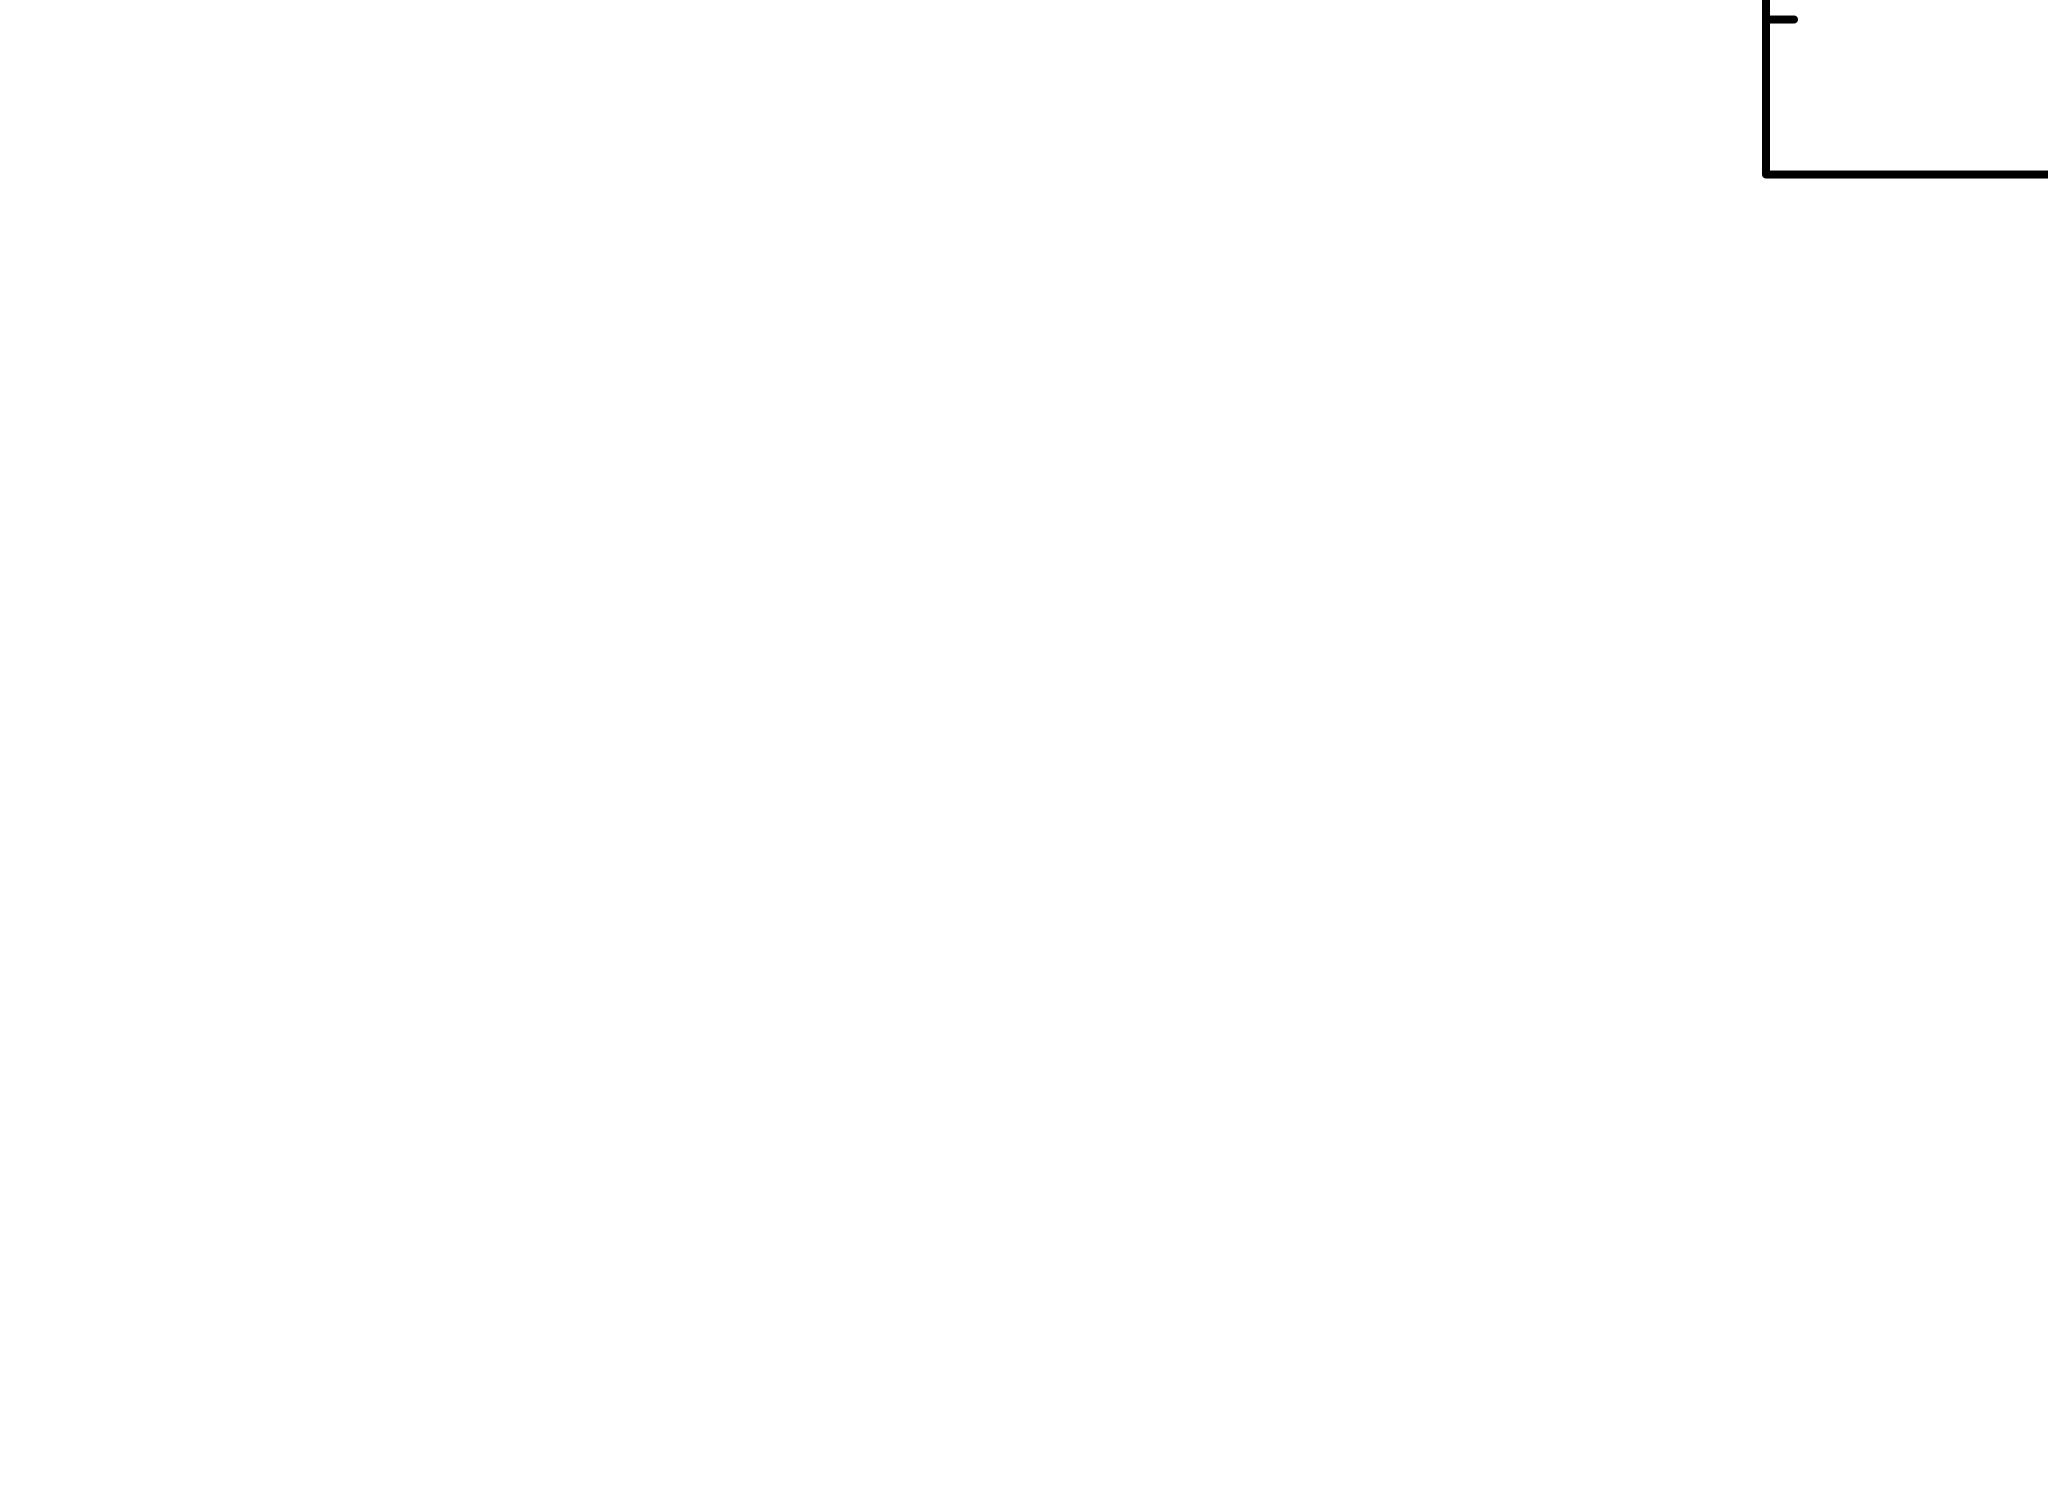

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")